In [3]:
# import os
# import shutil
# import requests
# from io import BytesIO
# from PIL import Image

# # Create an empty folder
# folder = 'safety_images'
# if os.path.exists(folder):
#     shutil.rmtree(folder)
# os.makedirs(folder)

# # Get the list of image URLs
# !curl https://challenge.blob.core.windows.net/challengefiles/summit_post_urls_selected.txt -o urls.txt
# urls = open("urls.txt", "r")

# # Download each image
# for url in urls.readlines():
#     url = url.rstrip()
#     filename = url.split('/')[-1]
#     response = requests.get(url)
#     img = Image.open(BytesIO(response.content))
#     saveAs = os.path.join(folder, filename)
#     print("writing " + saveAs)
#     img.save(saveAs, 'JPEG')
# print("Images downloaded to", folder)

In [17]:
import os
import shutil
import requests
from io import BytesIO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [14]:
from azure.cognitiveservices.vision.customvision.prediction import prediction_endpoint
from azure.cognitiveservices.vision.customvision.prediction.prediction_endpoint import models
from azure.cognitiveservices.vision.customvision.training import training_api
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateEntry, Region

def detect_objects_from_cv(training_key,prediction_key,project_id,image_file):
    
    '''Script to invoke custom vision Image object detection results '''

    trainer=training_api.TrainingApi(training_key)
    project=trainer.get_project(project_id)
    predictor = prediction_endpoint.PredictionEndpoint(prediction_key)
    with open(image_file,mode='rb') as test_data:
        detection_result=predictor.predict_image(project.id,test_data)

    return detection_result,test_data
            
project_id='4badf4c5-ecb9-42d0-a266-e99092cebe1e'
detection_training_key='fa38b163396e4f40a17095401b3dc259'
detection_prediction_key='aed35632f1ba42b2a00d0b12e3aecd38'
base_folder = os.getcwd()
base_model_file = os.path.join(base_folder, "safety_images", "test")

In [18]:
def detect_locations(pr_threshold=30,image_file=''):
    
    '''Function to plot objects identified in the image above a certain probability threshold'''

    detection_result,t=detect_objects_from_cv(training_key=detection_training_key,prediction_key=detection_prediction_key,project_id=project_id,image_file=image_file)
    im=np.array(Image.open(image_file),dtype=np.uint8)
    fig,ax=plt.subplots(1)
    img_height=im.shape[0]
    img_width=im.shape[1]
    ax.imshow(im)
    
    for prediction in detection_result.predictions:
        l=prediction.bounding_box.left
        t=prediction.bounding_box.top
        w=prediction.bounding_box.width
        h=prediction.bounding_box.height
        
        if prediction.probability*100.0>=pr_threshold:
            '''Check for probability threshold'''
            rect=patches.Rectangle((img_width*l,t*img_height),
                               w*img_width,
                               h*img_height,linewidth=1,edgecolor='r',facecolor='none',label=prediction.tag_name)
            ax.add_patch(rect)
            plt.text((l)*img_width,(t)*img_height,prediction.tag_name,color='white',fontweight='bold')
            print ("\t" + prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100))


    

	helmet: 90.99%
	helmet: 85.63%
	helmet: 55.28%


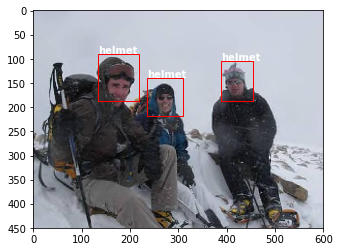

In [24]:
image_file=os.path.join(base_model_file,"481022.jpg")

detect_locations(pr_threshold=30,image_file=image_file) 

	helmet: 42.56%
	no helmet: 45.35%


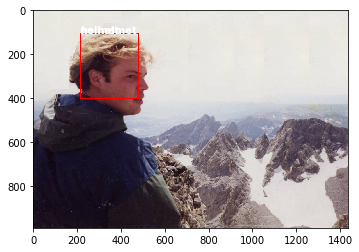

In [28]:
image_file=os.path.join(base_model_file,"481025.jpg")

detect_locations(pr_threshold=30,image_file=image_file) 